#### **`ARIMA`**

Método estatístico que utiliza autoregressão e médias móveis para previsão de séries temporais. Um modelo linear é construído incluindo um número especificado de termos e os dados são preparados por um nível de diferenciação afim de tornar este estacionário.

Podemos usar um valor 0 para desligar um parâmetro, dessa forma, aquela função em questão não será feita, por exemplo, se no parâmetro d definirmos 0 não será realizada uma diferenciação nos dados. Neste exemplo teríamos um modelo **ARMA**.

---

*   **AR**: *Autoregression* : Um modelo que usa a relação dependende entre uma observação e alguns lags.

*   **I**: *Integrated*  : Uso de diferenciação nas observações brutas, exemplo: subtração do valor de uma observação com sua observação anterior. O objetivo é transformar a série temporal em estacionária.

*  **MA**: *Moving Average* : Um modelo que usa a dependência entre a observação e o erro residual a partir de um modelo de média móvel aplicado a lags.

          residual error = expected − predicted
    
- Isso é diferente de **Moving Average Smoothing.**
- Erros residuais contém estruturas temporais que podem ser modeladas.
- Existem sinais complexos nos erros residuais.
- Um modelo que prever o erro residual pode ser usado para ajustar os próximos erros e melhorar um modelo que aprende com o histórico.




---

O modelo arima contém alguns parâmetros


```
# ARIMA(p,d,q)
```
*   **p:** O número de lags que foram devem ser incluídos no modelo.
*   **d:** O número de vezes que as observações serão diferenciadas.
*   **q:** O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

In [3]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Data Science Tutoriais/O que é ARIMA e como utilizar?/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [0]:
# elimina os warnings das bibliotecas
import warnings
warnings.filterwarnings("ignore")

In [0]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

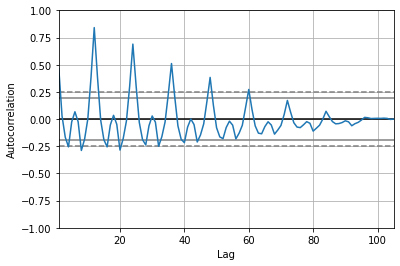

In [4]:
# autocorrelation plot 
autocorrelation_plot(series)
pyplot.show()

In [0]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

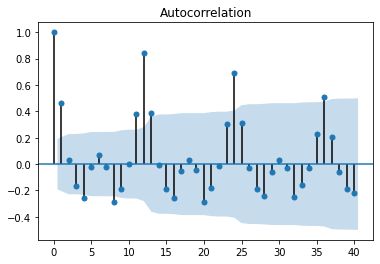

In [6]:
plot_acf(series, lags=40)
pyplot.show()

Modelo ARIMA para análise de dados

In [0]:
# fit model
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [8]:
# ARIMA(p,d,q)
model = ARIMA(series, order=(7,1,1))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [0]:
model_fit = model.fit()

In [10]:
# summary 
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -938.828
Method:                       css-mle   S.D. of innovations           1954.371
Date:                Sat, 06 Jun 2020   AIC                           1897.655
Time:                        21:44:32   BIC                           1924.099
Sample:                    02-01-1964   HQIC                          1908.369
                         - 09-01-1972                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.8411      5.224      4.564      0.000      13.603      34.079
ar.L1.D.Sales     0.4881      0.096      5.096      0.000       0.300       0.676
ar.L2.D.Sales    -0.2488      0.109     

In [0]:
# plot residuais
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

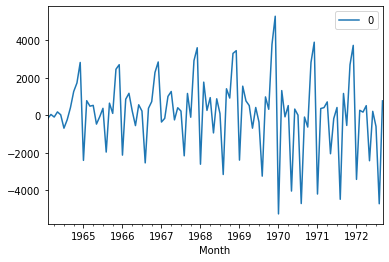

In [12]:
residuals.plot()
pyplot.show()

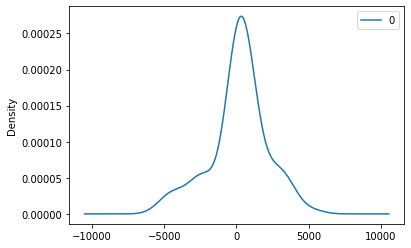

In [13]:
# gráficos de densidade dos residuais
residuals.plot(kind='kde')
pyplot.show()

In [14]:
# estatística descritiva dos residuos
print(residuals.describe())

                 0
count   104.000000
mean    157.065116
std    1981.387136
min   -5258.552134
25%    -388.866390
50%     327.212350
75%     988.685045
max    5283.472739


**Prevendo dados com ARIMA utilizando Walk Forward**

Separando os dados de treino e teste

In [0]:
# a variável X recebe os dados da série
X = series.values
X = X.astype('float32')

In [0]:
# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.50)

In [0]:
# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [0]:
# cria a variável history
history = [x for x in train]

In [0]:
# cria lista de previsões
predictions = list()

In [0]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [0]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [33]:
# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(0,0,1))
  
  # treina o modelo ARIMA
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

Valor predito=4455.107, Valor esperado=4647
Valor predito=4567.683, Valor esperado=4753
Valor predito=3691.090, Valor esperado=3965
Valor predito=1684.956, Valor esperado=1723
Valor predito=4744.831, Valor esperado=5048
Valor predito=5474.600, Valor esperado=6922
Valor predito=8556.384, Valor esperado=9858
Valor predito=10925.314, Valor esperado=11331
Valor predito=3726.032, Valor esperado=4016
Valor predito=4360.617, Valor esperado=3957
Valor predito=4059.717, Valor esperado=4510
Valor predito=4223.040, Valor esperado=4276
Valor predito=4659.008, Valor esperado=4968
Valor predito=4823.543, Valor esperado=4677
Valor predito=3931.824, Valor esperado=3523
Valor predito=1629.240, Valor esperado=1821
Valor predito=5091.520, Valor esperado=5222
Valor predito=6951.792, Valor esperado=6872
Valor predito=9839.749, Valor esperado=10803
Valor predito=11548.695, Valor esperado=13916
Valor predito=4687.849, Valor esperado=2639
Valor predito=3636.164, Valor esperado=2899
Valor predito=4369.347, Val

In [34]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 785.401


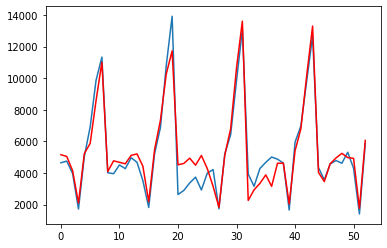

In [25]:
# plot forecasts against actual outcomes 
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### `Analisando Resíduos`

      Erro Residual = Valor esperado − Valor Predito

- Erros residuais são erros em previsões de séries temporais.
- Uma análise dos erros pode sugerir melhoras no modelo.
  - Tendências.
  - Sazonalidades.

In [0]:
# erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [0]:
# converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

In [37]:
# imprime as 5 primeiras linhas
residuals.head()

,0
0,191.892715
1,185.316899
2,273.910350
3,38.044217
4,303.168595


In [38]:
# estatística descritiva
residuals.describe()

,0
count,53.000000
mean,129.128269
std,782.127058
min,-2048.849021
25%,-264.302025
50%,130.479900
75%,405.685576
max,2367.304868


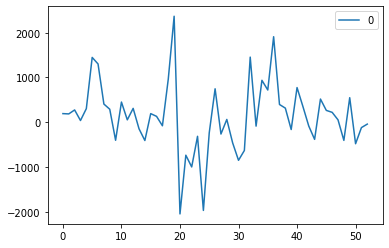

In [39]:
# plot residuals
residuals.plot()
pyplot.show()

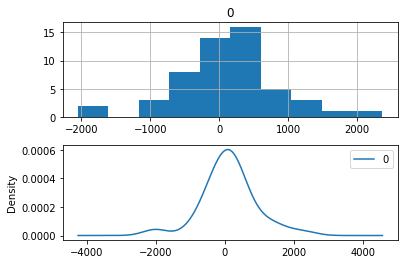

In [40]:
# plots histograma
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())

pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [0]:
# importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

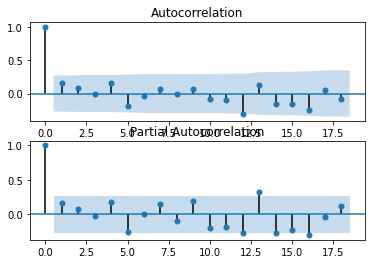

In [41]:
# plots de autocorrelação
pyplot.figure() 
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()